In [1]:
import pandas as pd
import numpy as np
from pybaselines import Baseline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("RigolDS0.csv", header=0, names=['Time', 'Signal'])

print(data)

            Time    Signal
0      -0.250000 -0.025442
1      -0.250000 -0.025442
2      -0.249999 -0.016961
3      -0.249999 -0.008481
4      -0.249998 -0.016961
...          ...       ...
999995  0.249997 -0.025442
999996  0.249998 -0.016961
999997  0.249998 -0.016961
999998  0.249999 -0.016961
999999  0.249999 -0.016961

[1000000 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

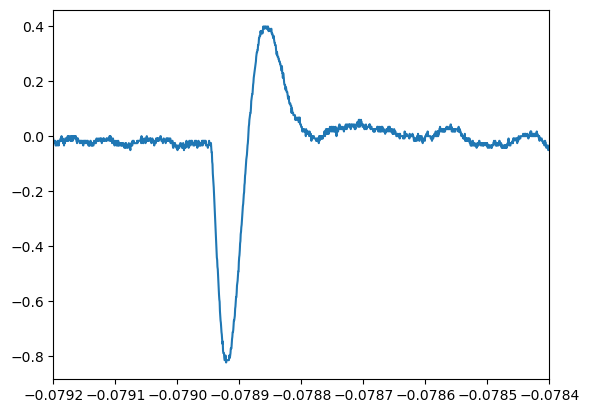

In [9]:
plt.plot(data.Time, data.Signal)
#plt.xlim(-0.0792,-0.0784)
plt.show

In [75]:
#find baseline
smooth_half_window = 50

poly_order = 1
num_std = 5

baseline_fitter = Baseline(x_data=data.Time)
baseline, params = baseline_fitter.dietrich(
        data.Signal, smooth_half_window=smooth_half_window, num_std=num_std, poly_order=poly_order, min_length=5
    )

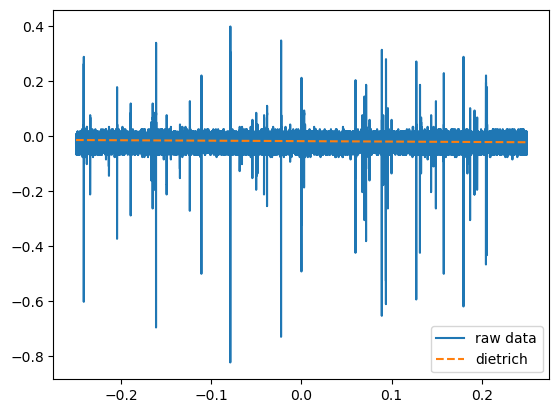

In [77]:
plt.plot(data.Time, data.Signal)
plt.plot(data.Time, baseline)

plt.show()

In [78]:
beta_signals = []
threshold = -0.08
num_row = data.shape[0]
min_signal = threshold - baseline
diff = data.Signal - baseline

for i in range(num_row):
    if diff[i] < min_signal[i]:
        beta_signals.append(diff[i])
    
print(beta_signals)
print(len(beta_signals))

[-0.07058031384312277, -0.07906089769064899, -0.11298269769064898, -0.11298268153817519, -0.13842468153817522, -0.1469056653857014, -0.1638666653857014, -0.1893076492332276, -0.19778864923322761, -0.23171063308075382, -0.24019163308075384, -0.27411361692828007, -0.28259461692828003, -0.3080356007758063, -0.3249966007758063, -0.33347758462333243, -0.35043858462333244, -0.36739956847085864, -0.38436056847085864, -0.3843605523183849, -0.3928415523183849, -0.4098025361659111, -0.4267635361659111, -0.4522055200134373, -0.4522055200134373, -0.4691665038609635, -0.4861274877084898, -0.49460848770848975, -0.503088471556016, -0.511569471556016, -0.5285304554035422, -0.5285304554035422, -0.5285304392510684, -0.5454914392510684, -0.5370104230985945, -0.5539724230985945, -0.5624524069461208, -0.5709334069461207, -0.5709333907936469, -0.5709333907936469, -0.5709333746411732, -0.5794133746411733, -0.5794133584886995, -0.5878943584886994, -0.5794133423362257, -0.5709333423362256, -0.5709333261837518,

(array([413., 387., 337., 338., 211., 225., 204., 213., 212., 135., 109.,
         81.,  88., 136.,  91.,  93.,  58.,  68.,  36.,  44.,  56.,  38.,
         58.,  58.,  39.,  59.,  72.,  40.,  41.,  40.,  40.,  51.,  37.,
         22.,  18.,  25.,  17.,  32.,  15.,  35.,  30.,  43.,  20.,   7.,
         21.,  13.,   9.,  17.,   8.,  14.,   3.,  16.,   5.,   3.,   2.,
          3.,   1.,   7.,   3.,  14.]),
 array([0.06290261, 0.07528363, 0.08766465, 0.10004567, 0.11242669,
        0.12480772, 0.13718874, 0.14956976, 0.16195078, 0.1743318 ,
        0.18671282, 0.19909385, 0.21147487, 0.22385589, 0.23623691,
        0.24861793, 0.26099896, 0.27337998, 0.285761  , 0.29814202,
        0.31052304, 0.32290406, 0.33528509, 0.34766611, 0.36004713,
        0.37242815, 0.38480917, 0.39719019, 0.40957122, 0.42195224,
        0.43433326, 0.44671428, 0.4590953 , 0.47147633, 0.48385735,
        0.49623837, 0.50861939, 0.52100041, 0.53338143, 0.54576246,
        0.55814348, 0.5705245 , 0.58290552, 0.

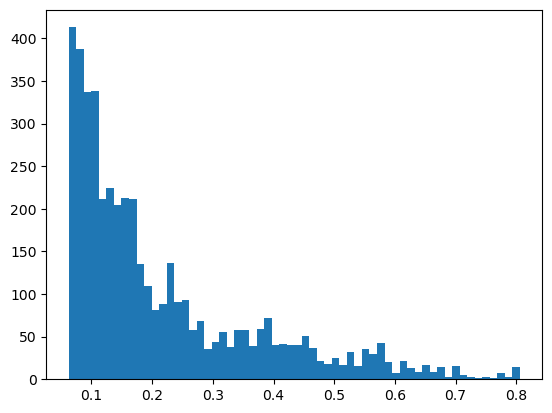

In [82]:
plt.hist(np.absolute(beta_signals), bins = 60, histtype = 'bar')